# RAINFALL PREDICTION WEATHER FORECASTING

##### Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
##### Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('rainfall_predict.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(8425, 23)

##### We have 8425 rows and 23 columns in dataset.

In [4]:
pd.options.display.max_columns=None
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### About the Columns

Date - The date of Observation

Location - Location of Rainfall

MinTemp - Minimum temperature in degree celcius

MaxTemp - Maximum temperature in degree celcius

Rainfall - The amount of rainfall recorded for the day in mm

Evaporation - The so-called Class A pan evaporation(mm) in the 24 hours to 9 am
       
Sunshine - The number of hours of bright sunshine in the day
 
WindGustDir - The direction of the strongest wind gust
 
WindGustSpeed - The speed (km/h) of the strongest wind gust
 
WindDir9am - Direction of the wind at 9am
 
WindDir3pm - Direction of the wind at 3pm
       
WindSpeed9am - Wind speed(km/h) at 9am
 
WindSpeed3pm - Wind speed (km/h) at 3pm
 
Humidity9am - Humidity(percent) at 9am
 
Humidity3pm - Humidity(percent) at 3pm
       
Pressure9am - Atmospheric Pressure (hpa) at 9am
 
Pressure3pm - Atmospheric Pressure(hpa) at 3pm
 
Cloud9am - Fraction of sky obscured by cloud at 9am
 
Cloud3pm - Fraction of sky obscured by cloud at 3pm
 
Temp9am - Temperature (degree C.) at 9am
       
Temp3pm - Temperature (degree C.) at 3pm

RainToday - 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm,otherwise 0

RainTomorrow - The amount of next day rain in mm.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

##### We have a information about the dataset. Lot of null values present in given dataset.

In [7]:
df.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

##### We dropped the column which have maximum null values.

In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
8421,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
8422,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
8423,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


### Handling the Missing Values

In [9]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   WindGustDir    7434 non-null   object 
 5   WindGustSpeed  8425 non-null   float64
 6   WindDir9am     7596 non-null   object 
 7   WindDir3pm     8117 non-null   object 
 8   WindSpeed9am   8425 non-null   float64
 9   WindSpeed3pm   8425 non-null   float64
 10  Humidity9am    8425 non-null   float64
 11  Humidity3pm    8425 non-null   float64
 12  Pressure9am    8425 non-null   float64
 13  Pressure3pm    8425 non-null   float64
 14  Temp9am        8425 non-null   float64
 15  Temp3pm        8425 non-null   float64
 16  RainToday      8185 non-null   object 
 17  RainTomorrow   8186 non-null   object 
dtypes: float

##### We fill the integer data by mean, now we have to fill objective data.

In [11]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0],inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   WindGustDir    8425 non-null   object 
 5   WindGustSpeed  8425 non-null   float64
 6   WindDir9am     8425 non-null   object 
 7   WindDir3pm     8425 non-null   object 
 8   WindSpeed9am   8425 non-null   float64
 9   WindSpeed3pm   8425 non-null   float64
 10  Humidity9am    8425 non-null   float64
 11  Humidity3pm    8425 non-null   float64
 12  Pressure9am    8425 non-null   float64
 13  Pressure3pm    8425 non-null   float64
 14  Temp9am        8425 non-null   float64
 15  Temp3pm        8425 non-null   float64
 16  RainToday      8425 non-null   object 
 17  RainTomorrow   8425 non-null   object 
dtypes: float

##### Now we dont have any null values in dataset.

In [13]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.100000,0.0,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.700000,0.0,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.000000,0.0,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.300000,1.0,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,E,31.000000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
8421,Uluru,3.6,25.300000,0.0,NNW,22.000000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
8422,Uluru,5.4,26.900000,0.0,N,37.000000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
8423,Uluru,7.8,27.000000,0.0,SE,28.000000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


### Data Analysis and Visualization

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

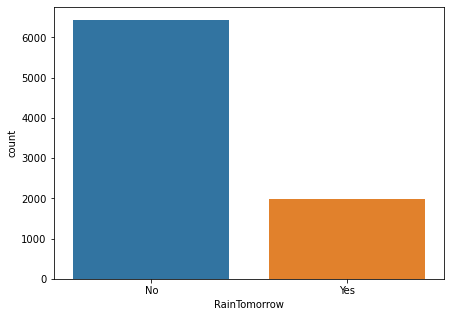

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'RainTomorrow',data=df)

##### Above plot shows the prediction for Rain tomorrow. Number of No Rain tommorow is more than the number of Yes Rain tomorrow.

<AxesSubplot:xlabel='Location', ylabel='count'>

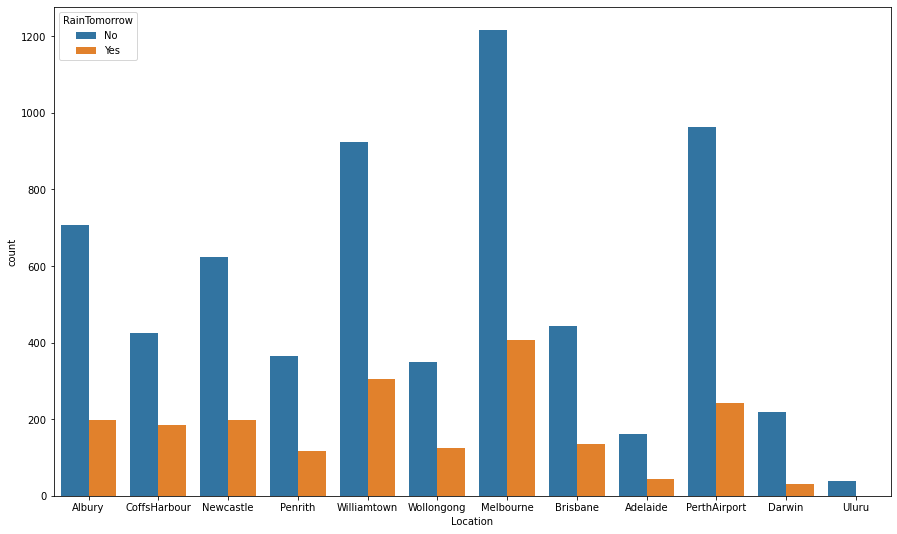

In [15]:
plt.figure(figsize=(15,9))
sns.countplot(x = 'Location',hue='RainTomorrow',data=df)

##### Yes rain prediction for Rain tomorrow is maximum for Melbourne city.

<AxesSubplot:xlabel='Rainfall', ylabel='MinTemp'>

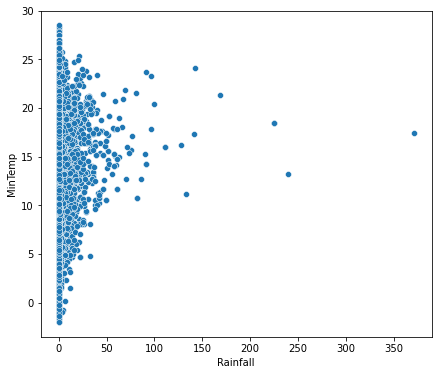

In [16]:
plt.figure(figsize=(7,6))
sns.scatterplot(x = 'Rainfall',y = 'MinTemp',data=df)

##### From above plot we can say that there is only 0 to 50 percent rainfall for minimum temperature.

<AxesSubplot:xlabel='Rainfall', ylabel='MaxTemp'>

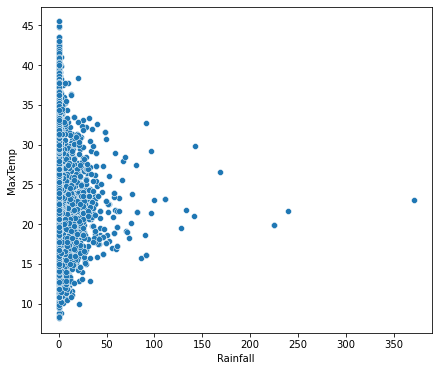

In [17]:
plt.figure(figsize=(7,6))
sns.scatterplot(x = 'Rainfall',y = 'MaxTemp',data=df)

##### From above plot we can say that there is heavy rainfall for maximum temp between 15 to 35.

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

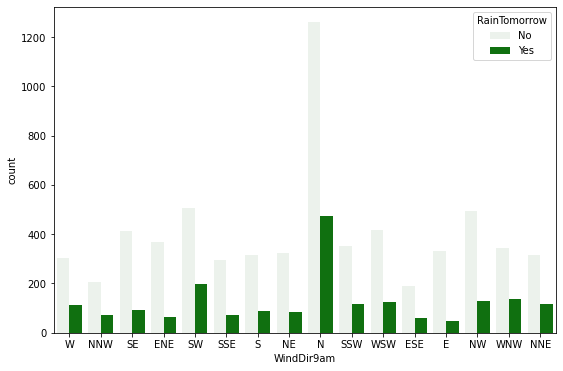

In [18]:
plt.figure(figsize=(9,6))
sns.countplot(x = 'WindDir9am',hue='RainTomorrow',data=df,color='g')

##### The wind direction at 9am from North has the maximum chances to fall rain tomorrow.

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

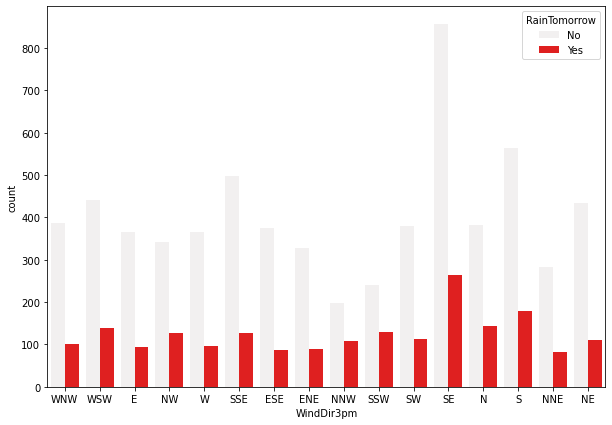

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'WindDir3pm',hue='RainTomorrow',data=df,color='r')

##### The wind direction at 3pm from South East side has the maximum chances to fall rain tomorrow.

### Description

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,17.762015,22.442934
std,5.379488,6.114516,10.309308,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,5.608301,5.945849
min,-2.000000,8.200000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,17.762015,22.000000
75%,17.300000,28.000000,1.400000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,21.900000,26.300000
max,28.500000,45.500000,371.000000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,44.100000


##### The description of dataset shows the Count,Standard Deviation,Mean,Maximum value and Minimum value of each column.

<AxesSubplot:>

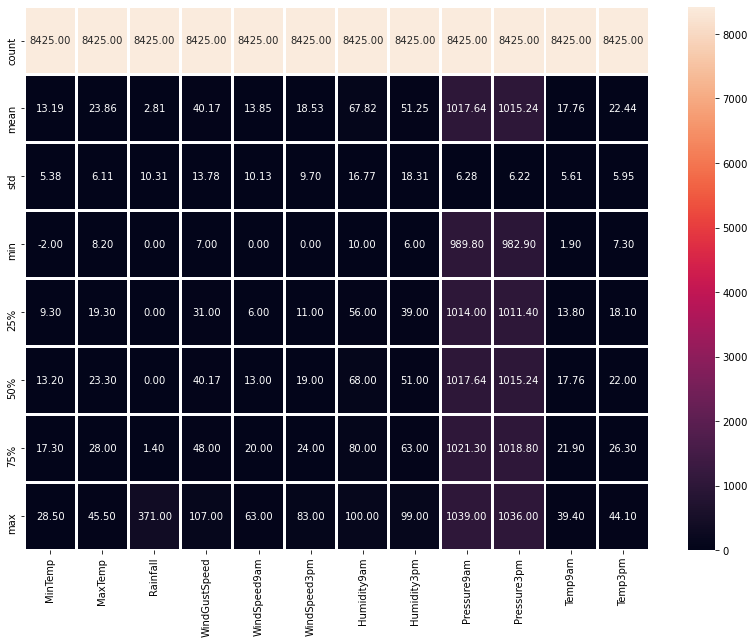

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe(),annot=True,fmt='.2f',linewidths=2)

#### Outcome of Description

MinTemp- 1.Mean = 13.19, 2.Std = 5.38, 3.Min = -2, Max = 28.50

MaxTemp - 1.Mean = 23.86, 2.Std = 6.11, 3.Min = 8.20, Max = 45.50

Rainfall - 1.Mean = 2.81, 2.Std = 10.31, 3.Min = 0, Max = 371

WindGustSpeed - 1.Mean = 40.17, 2.Std = 13.78, 3.Min = 7, Max = 107

WindSpeed9am - 1.Mean = 13.85, 2.Std = 10.13, 3.Min = 0, Max = 63

WindSpeed3pm - 1.Mean = 18.53, 2.Std = 9.70, 3.Min = 0, Max = 83

Humidity9am - 1.Mean = 67.82, 2.Std = 16.77, 3.Min = 10, Max = 100

Humidity3pm - 1.Mean = 51.25, 2.Std = 18.31, 3.Min = 6, Max = 99

Pressure9am - 1.Mean = 1017.64, 2.Std = 6.28, 3.Min = 989.80, Max = 1039

Pressure3pm - 1.Mean = 1015.24, 2.Std = 6.22, 3.Min = 982.90, Max = 1036

Temp9am - 1.Mean = 17.76, 2.Std = 5.61, 3.Min = 1.90, Max = 39.40

Temp3pm - 1.Mean = 22.44, 2.Std = 5.95, 3.Min = 7.30, Max = 44.10

### Correlation

In [22]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.717522,0.087684,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.887119,0.685520
MaxTemp,0.717522,1.000000,-0.087451,0.139998,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,0.866039,0.974506
Rainfall,0.087684,-0.087451,1.000000,0.086000,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,-0.007083,-0.090687
WindGustSpeed,0.230058,0.139998,0.086000,1.000000,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.202298,0.102199
WindSpeed9am,0.136872,0.013314,0.050631,0.600198,1.000000,0.560660,-0.358391,-0.110587,-0.174679,-0.138454,0.109798,-0.002606
WindSpeed3pm,0.178349,0.088172,0.024791,0.634939,0.560660,1.000000,-0.250953,-0.091004,-0.251697,-0.207544,0.184188,0.066087
Humidity9am,-0.130731,-0.390976,0.228800,-0.269593,-0.358391,-0.250953,1.000000,0.633291,0.142374,0.173415,-0.378344,-0.382401
Humidity3pm,0.079048,-0.421879,0.235444,-0.091860,-0.110587,-0.091004,0.633291,1.000000,0.001629,0.070369,-0.130414,-0.491485
Pressure9am,-0.429432,-0.325721,-0.072668,-0.407139,-0.174679,-0.251697,0.142374,0.001629,1.000000,0.961428,-0.410849,-0.283412
Pressure3pm,-0.422991,-0.403258,-0.033649,-0.372651,-0.138454,-0.207544,0.173415,0.070369,0.961428,1.000000,-0.439378,-0.369953


<AxesSubplot:>

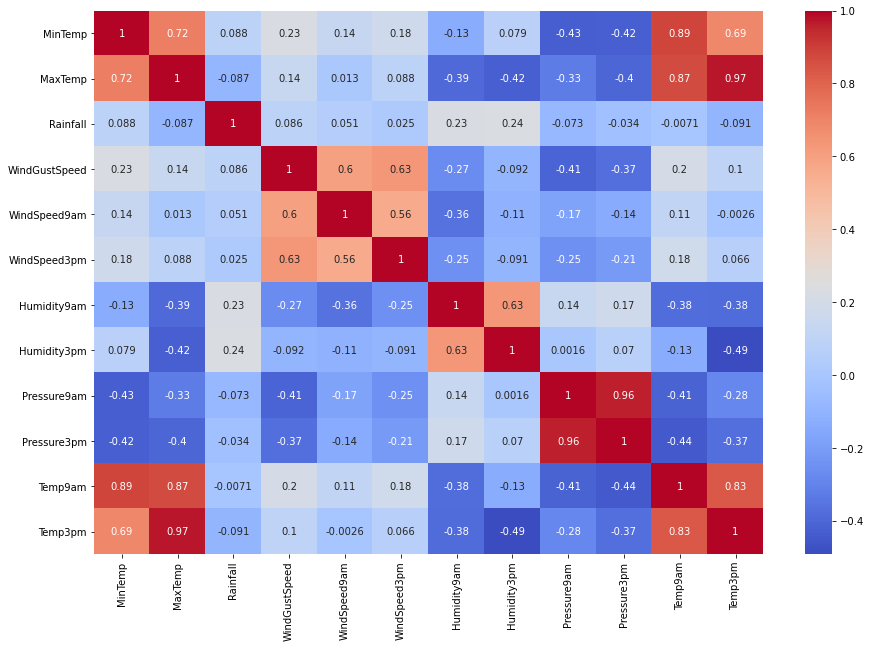

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

##### From above heatmap we can say that some columns are positively correlated and some are negatively correlated. MinTemp is 72 percent correlated with MaxTemp which considered to be a good bond. MinTemp is 89 percent and 69 percent correlated with Temp9am and Temp3pm resp which considered to be a good bond.
##### WindGutsSpeed  is 63 percent and 60 percent correlated with WindSpeed3pm and WindSpeed9am rsp. WindSpeed9am is 56 percent correlated with WindSpeed3pm. Humidity9am and Humidity3pn are 63 percent correlated with each other. Pressure9am and Pressure3pm are 96 percent correlated with each other.
##### Temp9am is 89 percent and 87 percent correlated with Mintemp and Maxtemp. Temp3pm is 97 percent and 67 percent correlated with MaxTemp and MinTemp. Temp9am and TEmp3pm are 83 percent correlated with each other.

In [24]:
non_cat_columns = []
for i in df.dtypes.index:
    if df[i].dtypes != object:
        non_cat_columns.append(i)
non_cat_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [25]:
cat_columns = []
for i in df.dtypes.index:
    if df[i].dtypes == object:
        cat_columns.append(i)
cat_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

## Data Cleaning

### Skewness

In [26]:
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [27]:
df.skew().sort_values(ascending=False)

Rainfall         13.218403
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
MaxTemp           0.380654
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
MinTemp          -0.089989
Humidity9am      -0.256743
dtype: float64

##### Let's set the threshold for skewness at 0.75

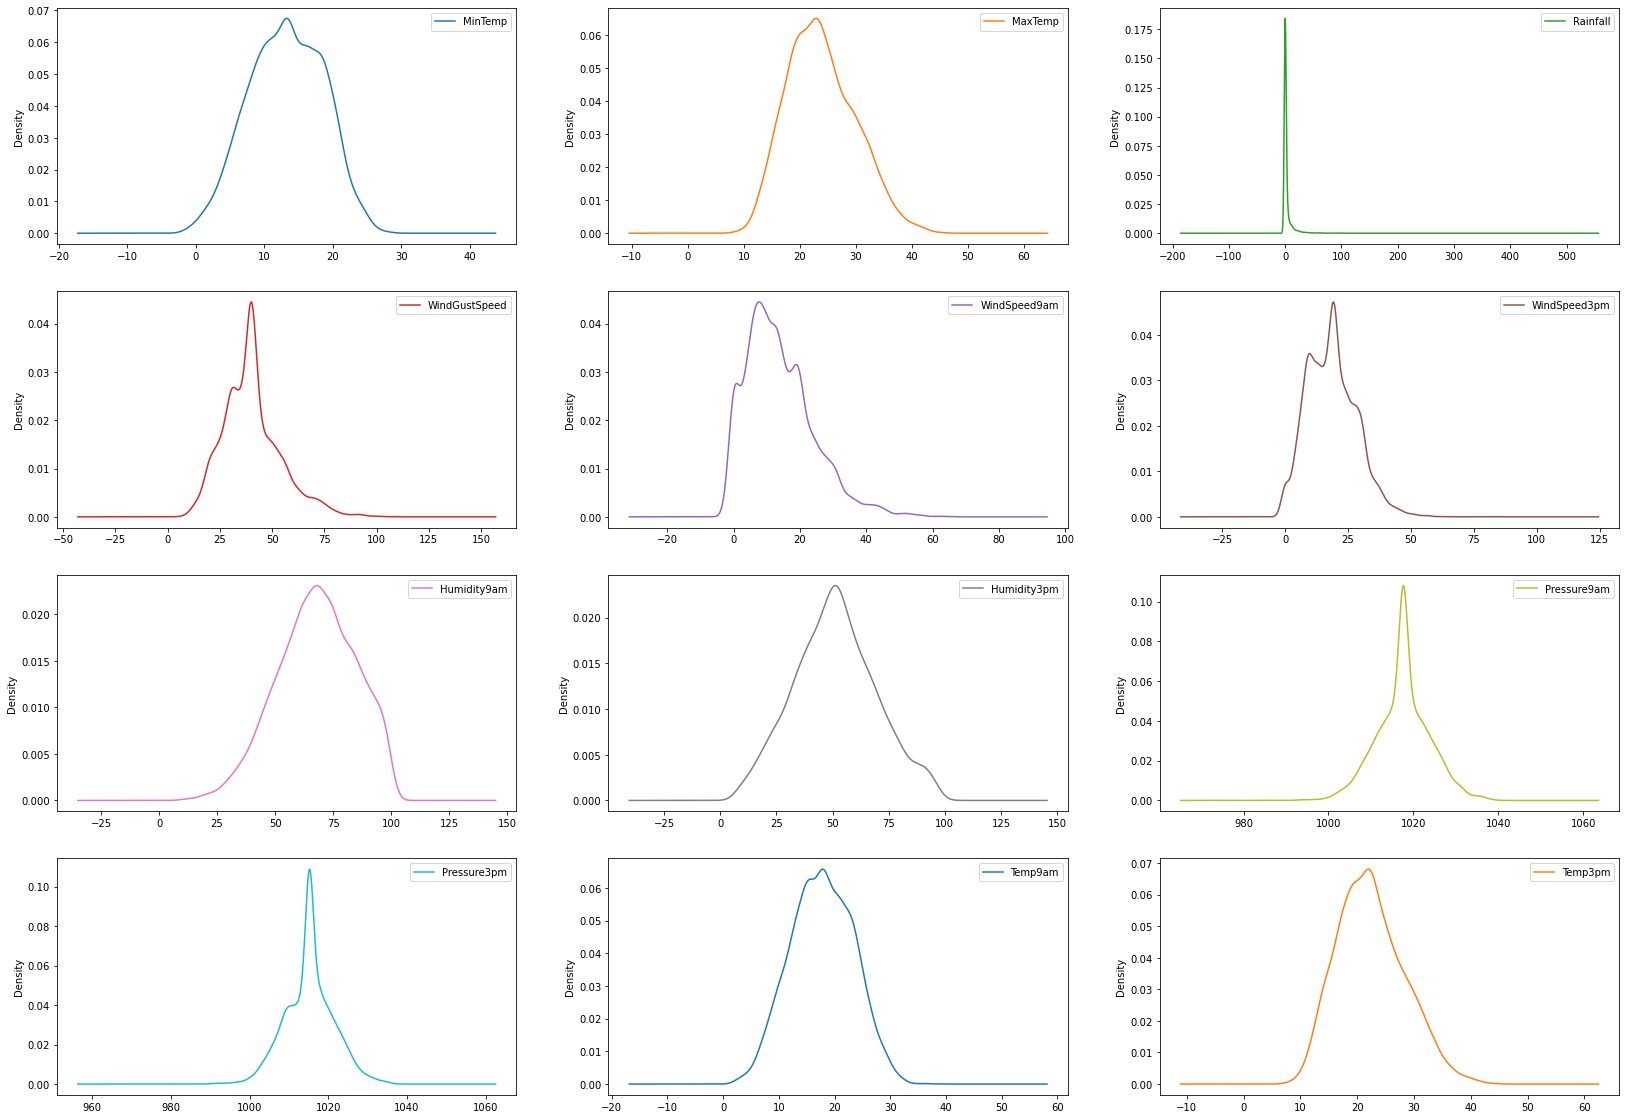

In [28]:
df.plot(kind = 'density',subplots=True,layout=(4,3),figsize=(28,20),sharex=False)
plt.show()

##### We can see the skewness in data for multiple columns.

### Data Conversion

In [29]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [30]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i] = lec.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.900000,0.6,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.100000,0.0,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.700000,0.0,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.000000,0.0,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.300000,1.0,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
8421,9,3.6,25.300000,0.0,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
8422,9,5.4,26.900000,0.0,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
8423,9,7.8,27.000000,0.0,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


### Checking Outliers

In [32]:
df_cat_columns = df[cat_columns]
df_cat_columns

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1,13,13,14,0,0
1,1,14,6,15,0,0
2,1,15,13,15,0,0
3,1,4,9,0,0,0
4,1,13,1,7,0,0
...,...,...,...,...,...,...
8420,9,0,9,1,0,0
8421,9,6,9,3,0,0
8422,9,3,9,14,0,0
8423,9,9,10,3,0,0


In [33]:
df_non_cat_columns = df[non_cat_columns]
df_non_cat_columns

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.100000,0.0,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.700000,0.0,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.000000,0.0,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.300000,1.0,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
8421,3.6,25.300000,0.0,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
8422,5.4,26.900000,0.0,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1
8423,7.8,27.000000,0.0,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0


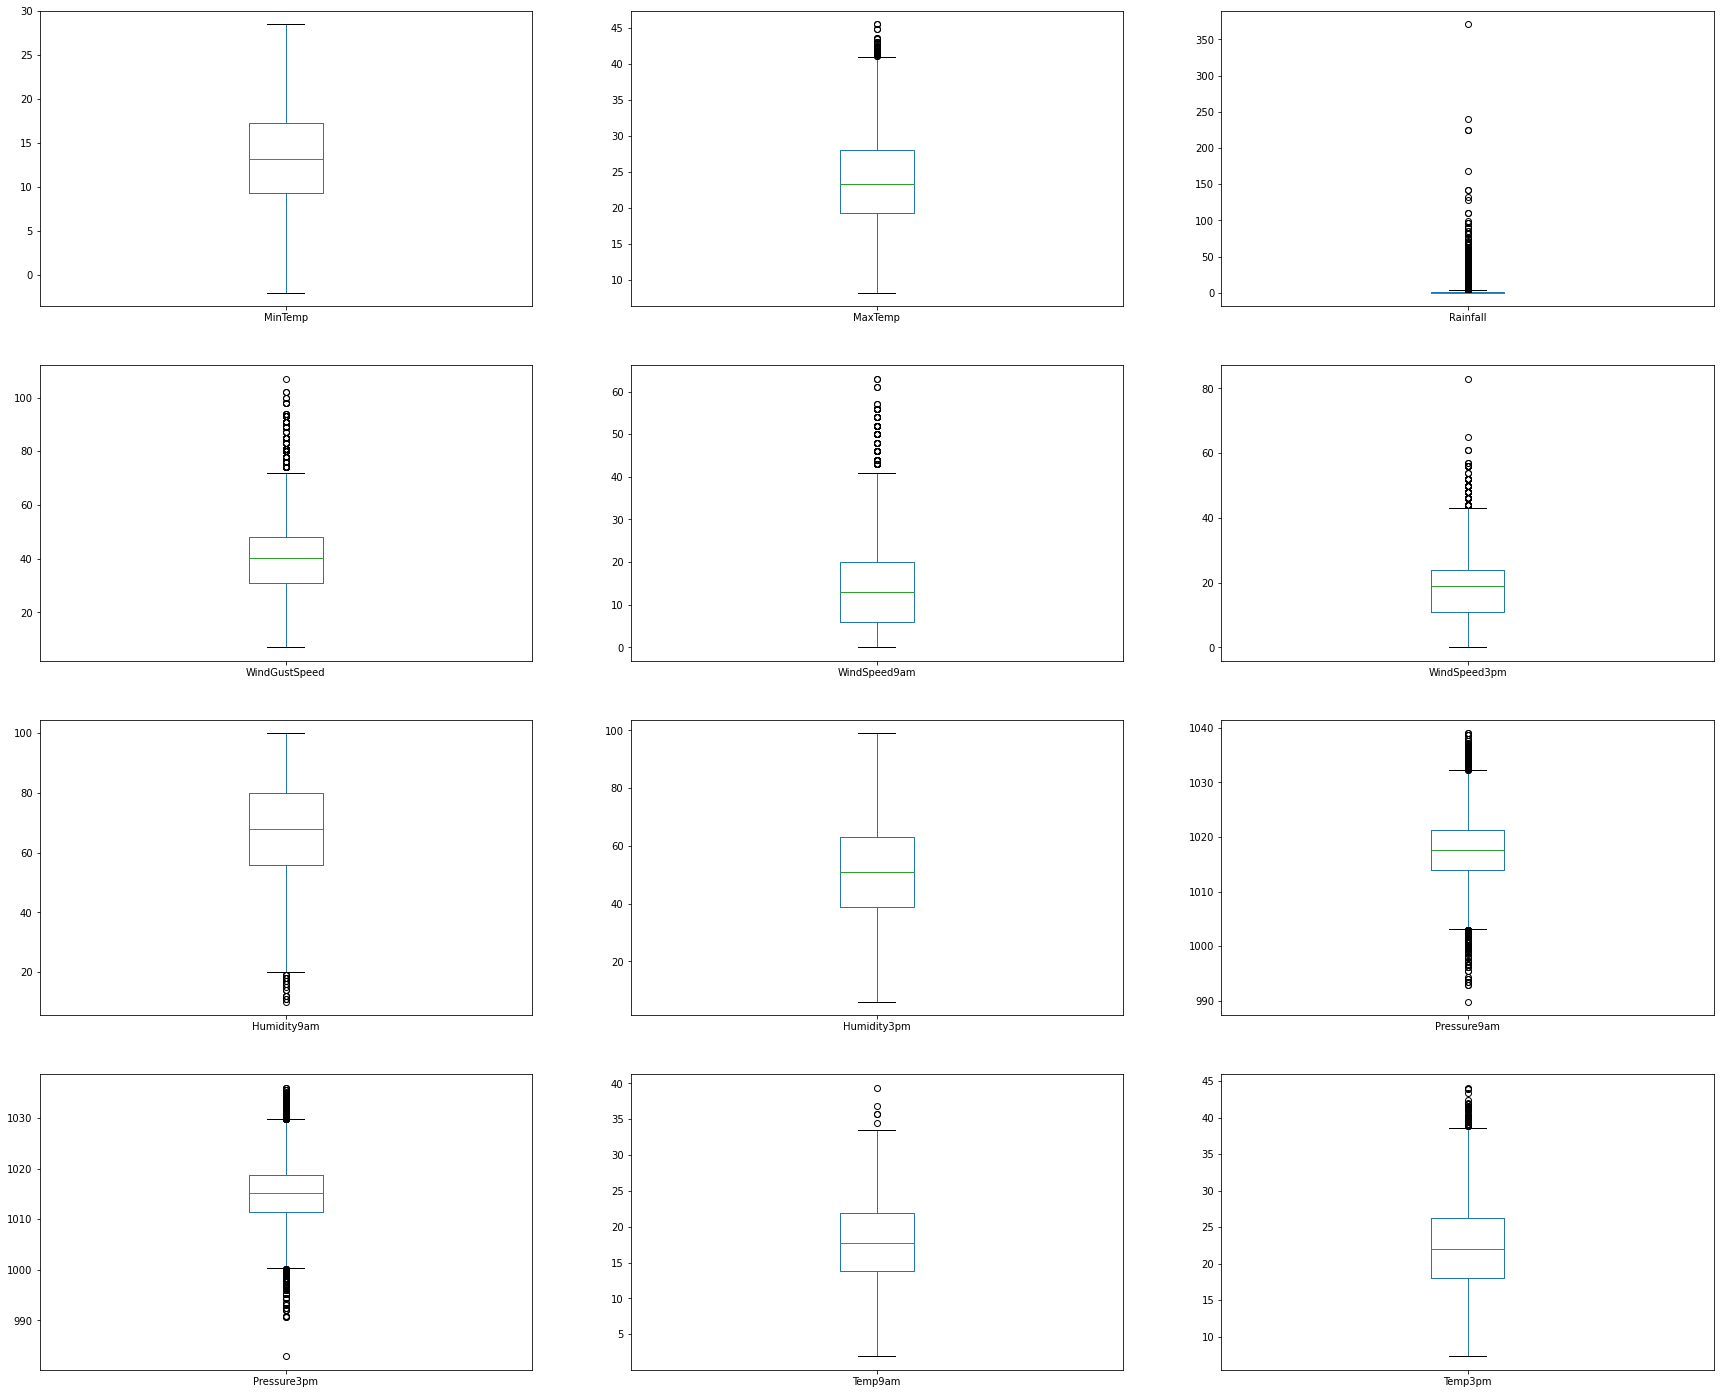

In [34]:
df_non_cat_columns.plot(kind = 'box',subplots = True,layout = (4,3),figsize=(30,25))
plt.show()

##### We can see outliers present in :

MaxTemp	Rainfall	

WindGustSpeed	

WindSpeed9am	

WindSpeed3pm	

Humidity9am	

Pressure9am

Pressure3pm	

Temp9am	

Temp3pm

### Removing Outliers

#### Z Score Technique

In [35]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(8425, 18)

In [36]:
df = df[(z<3).all(axis = 1)]
df.shape

(8061, 18)

### Percenatage Data Loss

In [37]:
percentage_data_loss = (8425-8061)/8425*100
percentage_data_loss

4.320474777448071

### Splitting the Independent and Target Variable in x and y

In [38]:
x = df.drop('RainTomorrow',axis=1)
x.shape

(8061, 17)

In [39]:
y = df['RainTomorrow']
y.shape

(8061,)

### Removing Skewness

In [40]:
x.skew().sort_values(ascending=False)

Rainfall         3.479013
RainToday        1.305239
WindSpeed9am     0.713295
WindGustSpeed    0.509872
Temp3pm          0.327498
MaxTemp          0.308400
WindSpeed3pm     0.296566
WindDir9am       0.159331
Humidity3pm      0.127687
WindGustDir      0.109209
Pressure3pm      0.043661
Pressure9am      0.015198
Temp9am         -0.045497
Location        -0.052587
MinTemp         -0.091283
WindDir3pm      -0.124101
Humidity9am     -0.227711
dtype: float64

#### Normalizing the data using Log Tranformation

In [41]:
x['Rainfall'] = np.log(1+x['Rainfall'])
x['RainToday'] = np.log(1+x['RainToday'])

In [42]:
x.skew().sort_values(ascending=False)

Rainfall         1.668056
RainToday        1.305239
WindSpeed9am     0.713295
WindGustSpeed    0.509872
Temp3pm          0.327498
MaxTemp          0.308400
WindSpeed3pm     0.296566
WindDir9am       0.159331
Humidity3pm      0.127687
WindGustDir      0.109209
Pressure3pm      0.043661
Pressure9am      0.015198
Temp9am         -0.045497
Location        -0.052587
MinTemp         -0.091283
WindDir3pm      -0.124101
Humidity9am     -0.227711
dtype: float64

In [43]:
x.drop(['RainToday'],axis=1,inplace=True)
x.shape

(8061, 16)

##### We drop the  Raintoday column because it has still skewness even afeter the normalizing.

### Checking if dataset is balanced

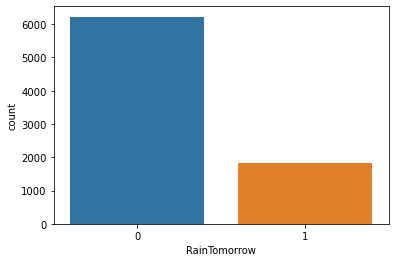

In [44]:
sns.countplot(y)
plt.show()

##### From above plot we can see that data is imbalanced so we have to balanced it.

### Balancing the Data

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [47]:
x.shape

(12452, 16)

(12452,)
0    6226
1    6226
Name: RainTomorrow, dtype: int64



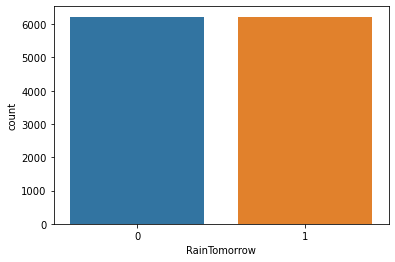

In [48]:
print(y.shape)
print(y.value_counts())
print()
sns.countplot(y)
plt.show()

##### Data is balanced now after applying the SMOTE.

### Scaling the Model

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,-1.543447,-0.014771,-0.059607,-0.237363,1.284721,0.246882,1.294835,1.473737,0.689510,0.600216,0.007489,-1.812200,-1.608123,-1.331371,-0.139469,0.011463
1,-1.543447,-1.155432,0.315100,-0.732505,1.506000,0.246882,-0.282081,1.707814,-1.031360,0.387760,-1.646181,-1.654051,-1.116491,-1.211614,-0.084318,0.447420
2,-1.543447,-0.109826,0.417293,-0.732505,1.727278,0.397935,1.294835,1.707814,0.581956,0.812671,-2.013663,-1.390470,-1.625076,-1.057640,0.614257,0.255599
3,-1.543447,-0.813234,0.809032,-0.732505,-0.706788,-1.263641,0.393740,-1.803347,-0.278479,-0.993204,-1.584934,-2.128498,0.070208,-0.356205,0.081134,0.831063
4,-1.543447,0.764680,1.541414,-0.002284,1.284721,0.020304,-1.408449,-0.164805,-0.708697,0.175304,0.681207,-1.232321,-1.082585,-1.519561,0.025983,1.389090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,0.738591,-0.362735,-0.555144,-0.548007,-0.264230,-0.203179,-0.732628,0.069272,0.030960,-0.364543,-0.203110,1.825227,-0.845523,-0.724451,-0.249017,-0.939998
12448,-0.565430,0.642092,-0.617555,1.336095,0.399606,-1.399070,0.393740,-0.867038,-0.352660,-1.205659,1.354925,1.872490,-0.412409,-0.379355,0.015206,-0.574226
12449,-1.543447,-0.214725,-0.391718,0.559723,0.399606,2.260796,-1.183175,-1.101115,-0.374195,0.210878,0.545229,0.899790,-1.240364,-1.842096,-0.240991,-0.780615
12450,-0.565430,-0.113169,-0.933995,1.072139,1.506000,0.626744,-0.957902,0.771504,0.041007,0.531489,1.048689,1.508929,-2.663443,-2.345783,-0.619329,-1.363344


### Training Process

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [51]:
lr = LogisticRegression()
lr

LogisticRegression()

### Best Random State

In [52]:
maxAccu = 0
maxRs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if maxAccu<acc:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is',maxAccu,'on Random State',maxRs)

Best Accuracy Score is 0.7748152907163508 on Random State 78


In [62]:
from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv = cross_val_score(lr,x,y,cv=j)
    cv_score = np.abs(cv.mean())
    print('For crossfold',j,'cv score is',cv_score,'Accuracy score is',maxAccu)

For crossfold 2 cv score is 0.7160295534853839 Accuracy score is 0.7748152907163508
For crossfold 3 cv score is 0.6807825471967369 Accuracy score is 0.7748152907163508
For crossfold 4 cv score is 0.6961130742049471 Accuracy score is 0.7748152907163508
For crossfold 5 cv score is 0.6984478419498952 Accuracy score is 0.7748152907163508
For crossfold 6 cv score is 0.6889717637408981 Accuracy score is 0.7748152907163508
For crossfold 7 cv score is 0.7092938515183794 Accuracy score is 0.7748152907163508
For crossfold 8 cv score is 0.7259194008152914 Accuracy score is 0.7748152907163508
For crossfold 9 cv score is 0.7220679844389924 Accuracy score is 0.7748152907163508
For crossfold 10 cv score is 0.71836540383041 Accuracy score is 0.7748152907163508
For crossfold 11 cv score is 0.721008673305493 Accuracy score is 0.7748152907163508
For crossfold 12 cv score is 0.7284196978958993 Accuracy score is 0.7748152907163508
For crossfold 13 cv score is 0.7281729261068401 Accuracy score is 0.77481529

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=78)

In [64]:
x_train.shape

(9339, 16)

In [65]:
x_test.shape

(3113, 16)

In [66]:
y_train.shape

(9339,)

In [67]:
y_test.shape

(3113,)

### Model Testing

In [68]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    Accuracy = accuracy_score(y_test,pred)*100
    print('Accuracy',Accuracy)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    cv = cross_val_score(model,x,y,cv = 18)
    cv_score = cv.mean()*100
    print('Cross vvalidation score is ',cv_score)
    print('Difference between cv and accuracy score is ',Accuracy-cv_score)
    

### Logistic Regression

In [69]:
lr = LogisticRegression()
Model(lr)

Accuracy 77.48152907163508
[[1257  344]
 [ 357 1155]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1601
           1       0.77      0.76      0.77      1512

    accuracy                           0.77      3113
   macro avg       0.77      0.77      0.77      3113
weighted avg       0.77      0.77      0.77      3113

Cross vvalidation score is  73.6617553702201
Difference between cv and accuracy score is  3.8197737014149737


### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Model(rf)

Accuracy 93.35046578862833
[[1483  118]
 [  89 1423]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1601
           1       0.92      0.94      0.93      1512

    accuracy                           0.93      3113
   macro avg       0.93      0.93      0.93      3113
weighted avg       0.93      0.93      0.93      3113

Cross vvalidation score is  90.19468354948059
Difference between cv and accuracy score is  3.15578223914774


### Service Vector Classifier

In [71]:
from sklearn.svm import SVC

svm = SVC()
Model(svm)

Accuracy 77.06392547381947
[[1256  345]
 [ 369 1143]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1601
           1       0.77      0.76      0.76      1512

    accuracy                           0.77      3113
   macro avg       0.77      0.77      0.77      3113
weighted avg       0.77      0.77      0.77      3113

Cross vvalidation score is  74.3121024791637
Difference between cv and accuracy score is  2.751822994655768


### AdaBoost Classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
Model(adb)

Accuracy 80.14776742691937
[[1308  293]
 [ 325 1187]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1601
           1       0.80      0.79      0.79      1512

    accuracy                           0.80      3113
   macro avg       0.80      0.80      0.80      3113
weighted avg       0.80      0.80      0.80      3113

Cross vvalidation score is  73.114753222225
Difference between cv and accuracy score is  7.033014204694368


### KNeighbours Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
Model(kn)

Accuracy 86.12271121105043
[[1245  356]
 [  76 1436]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1601
           1       0.80      0.95      0.87      1512

    accuracy                           0.86      3113
   macro avg       0.87      0.86      0.86      3113
weighted avg       0.87      0.86      0.86      3113

Cross vvalidation score is  84.19672558549364
Difference between cv and accuracy score is  1.925985625556791


### Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
Model(dt)

Accuracy 86.15483456472856
[[1352  249]
 [ 182 1330]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1601
           1       0.84      0.88      0.86      1512

    accuracy                           0.86      3113
   macro avg       0.86      0.86      0.86      3113
weighted avg       0.86      0.86      0.86      3113

Cross vvalidation score is  85.3112710721479
Difference between cv and accuracy score is  0.8435634925806568


### Extra Tree Classifier

In [75]:
from sklearn.tree import ExtraTreeClassifier

et = ExtraTreeClassifier()
Model(et)

Accuracy 86.41182139415355
[[1374  227]
 [ 196 1316]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1601
           1       0.85      0.87      0.86      1512

    accuracy                           0.86      3113
   macro avg       0.86      0.86      0.86      3113
weighted avg       0.86      0.86      0.86      3113

Cross vvalidation score is  84.49991727755797
Difference between cv and accuracy score is  1.9119041165955792


### Hyper Parameter Tuning

#### Logistic Regression

In [76]:
LogisticRegression()

LogisticRegression()

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C':[0.1,1,10]
             }

In [78]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=19,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [79]:
GCV.best_estimator_

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [80]:
lr = LogisticRegression(C=10, solver='sag')
Model(lr)

Accuracy 77.48152907163508
[[1256  345]
 [ 356 1156]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1601
           1       0.77      0.76      0.77      1512

    accuracy                           0.77      3113
   macro avg       0.77      0.77      0.77      3113
weighted avg       0.77      0.77      0.77      3113

Cross vvalidation score is  73.55760874515632
Difference between cv and accuracy score is  3.9239203264787648


#### Decision Tree Classifier

In [81]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [82]:
parameters = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"]}

In [83]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameters,cv=19,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [84]:
GCV.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [85]:
dt = DecisionTreeClassifier(criterion='entropy')
Model(dt)

Accuracy 88.53196273690973
[[1396  205]
 [ 152 1360]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1601
           1       0.87      0.90      0.88      1512

    accuracy                           0.89      3113
   macro avg       0.89      0.89      0.89      3113
weighted avg       0.89      0.89      0.89      3113

Cross vvalidation score is  85.97035515811604
Difference between cv and accuracy score is  2.561607578793698


#### Extra Tree Classifier

In [86]:
ExtraTreeClassifier()

ExtraTreeClassifier()

In [87]:
parameters = {'criterion' : ["gini", "entropy"],
              'splitter' : ["random", "best"]}

In [88]:
GCV = GridSearchCV(ExtraTreeClassifier(),parameters,cv=19,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [89]:
GCV.best_estimator_

ExtraTreeClassifier(criterion='entropy', splitter='best')

In [90]:
et = ExtraTreeClassifier(criterion='entropy', splitter='best')
Model(et)

Accuracy 86.3475746867973
[[1375  226]
 [ 199 1313]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1601
           1       0.85      0.87      0.86      1512

    accuracy                           0.86      3113
   macro avg       0.86      0.86      0.86      3113
weighted avg       0.86      0.86      0.86      3113

Cross vvalidation score is  84.9428076554508
Difference between cv and accuracy score is  1.4047670313464948


##### We can see that Accuracy score for Random Forest Classifier is highest than other models without hyper parameter tuning,but the difference between Accuracy and Cross Validation is more. So we choose Extra Tree Classifier without Hyper Parameter Tuning as our Final Model.